# CRE

Here we get a first estimate of CRE and feedback and we try to sanity check it. Schulz and Stevens ([2023](https://doi.org/10.1029/2023MS003648)) compare their CRE variability to CERES. Sadly they only show how the CRE differs from the CRE mean, not the actual CRE. We still try to reproduce these numbers for our limit subset (control simulation for the same few days we also have a warming simulation).



In [1]:
import xarray as xr
import pandas as pd
import numpy as np

def load_daily_averaged():
    data = xr.open_dataset('./data/dom01_subset.nc')
    data = xr.open_dataset('/Users/admin/levantini/dom01_subset.nc')
    data = data.mean(dim='cell', keep_attrs=True)

    points_per_24h = int(pd.Timedelta('24h') / pd.to_timedelta(data.time.values[1] - data.time.values[0])) # determine the frequency
    chunk_index = xr.DataArray(np.arange(len(data.time)) // points_per_24h, dims='time', coords={'time': data.time})
    data = data.groupby(chunk_index).mean(skipna=True, keep_attrs=True).rename({'group':'day'})
    return data

data = load_daily_averaged()

## net TOA

In [2]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,3, figsize=(19,5))
x = data.day.values

for ax, cloudcover in zip(axs, [0, 0.5, 1]):
    for exp, kw in zip(data.exp.values, [{'color':'red'},{'color':'black'}]):
        y = data.sel(exp=exp).sel(cloudcover=cloudcover)['rad_net']
        y.plot(ax=ax, **kw)
        
y_lim = np.ravel([ax.get_ylim() for ax in axs])
for ax in axs: 
    ax.set_ylim(np.min(y_lim), np.max(y_lim))
    ax.set_ylim(ax.get_ylim()[::-1])
fig.show()

/var/folders/0k/t6dd90sx62z4gfqnklc1kkpw0000gp/T/ipykernel_83756/1749510171.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


In [3]:
fig, ax = plt.subplots(figsize=(8,1))

y = data.sel(exp='control').sel(cloudcover=0.5)['rad_net']
# y_err = y - np.mean(y.values)
ax.boxplot(y, vert=False)
ax.set_xlabel('net TOA / $W/m^2$')
fig.show()

/var/folders/0k/t6dd90sx62z4gfqnklc1kkpw0000gp/T/ipykernel_83756/3425496004.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


Range in *net TOA* is in line with Schulz and Stevens ([2023](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2023MS003648)):


/var/folders/0k/t6dd90sx62z4gfqnklc1kkpw0000gp/T/ipykernel_83756/3187299402.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


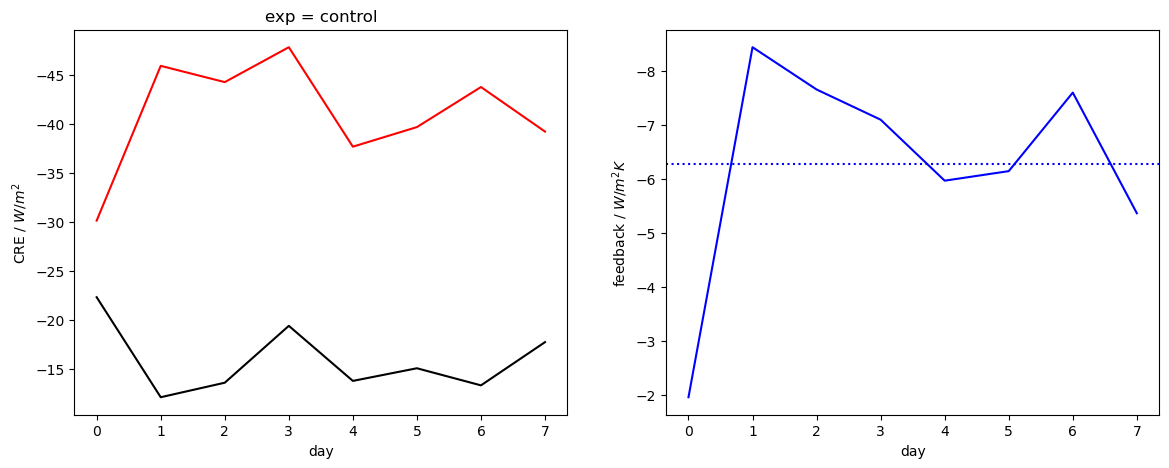

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(14,5))
x = data.day.values

ax = axs[0]
cre = data.sel(cloudcover=1)['rad_net'] - data.sel(cloudcover=0)['rad_net']

for exp, kw in zip(data.exp.values, [{'color':'red'},{'color':'black'}]):
    y = cre.sel(exp=exp)
    y.plot(ax=ax, **kw)# y.plot(ax=ax, **kw)
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_ylabel('CRE / $W/m^2$')

ax = axs[1]
swfeedback = cre.sel(exp='warming') - cre.sel(exp='control')
swfeedback.values = swfeedback.values / 4
kw = {'color':'blue'}
swfeedback.plot(ax=ax, **kw)# y.plot(ax=ax, **kw)
ax.axhline(np.mean(swfeedback.values), ls=':', **kw)
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_ylabel('feedback / $W/m^2K$')

fig.show()

In [5]:
fig, ax = plt.subplots(figsize=(8,1))

c_err = cre.sel(exp='control')
c_err = c_err - np.mean(c_err.values)
ax.boxplot(c_err, vert=False)
ax.set_xlabel('CRE - $\\overline{CRE}$ / $W/m^2$')
fig.show()

/var/folders/0k/t6dd90sx62z4gfqnklc1kkpw0000gp/T/ipykernel_83756/2104936241.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


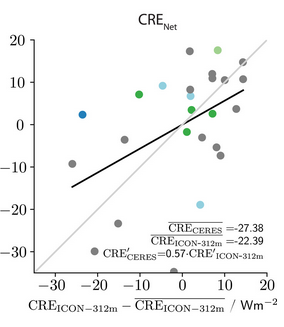

## Short wave

In [6]:
fig, axs = plt.subplots(1,3, figsize=(19,5))
x = data.day.values

for ax, cloudcover in zip(axs, [0, 0.5, 1]):
    for exp, kw in zip(data.exp.values, [{'color':'red'},{'color':'black'}]):
        y = data.sel(exp=exp).sel(cloudcover=cloudcover)['sw_net']
        y.plot(ax=ax, **kw)
        
y_lim = np.ravel([ax.get_ylim() for ax in axs])
for ax in axs: 
    ax.set_ylim(np.min(y_lim), np.max(y_lim))
    ax.set_ylim(ax.get_ylim()[::-1])
fig.show()

/var/folders/0k/t6dd90sx62z4gfqnklc1kkpw0000gp/T/ipykernel_83756/4143054983.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


/var/folders/0k/t6dd90sx62z4gfqnklc1kkpw0000gp/T/ipykernel_83756/2410881304.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


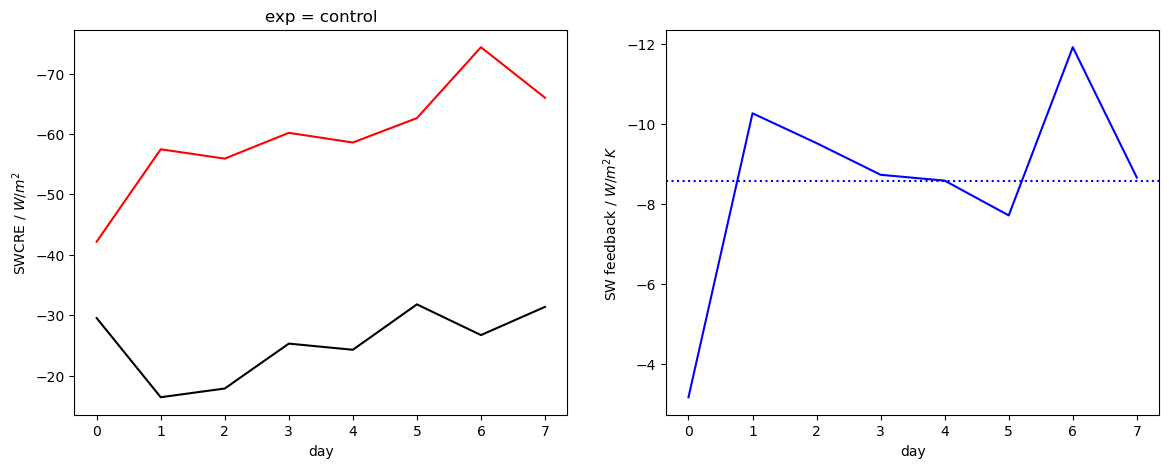

In [7]:
fig, axs = plt.subplots(1,2, figsize=(14,5))
x = data.day.values

ax = axs[0]
cre = data.sel(cloudcover=1)['sw_net'] - data.sel(cloudcover=0)['sw_net']

for exp, kw in zip(data.exp.values, [{'color':'red'},{'color':'black'}]):
    y = cre.sel(exp=exp)
    y.plot(ax=ax, **kw)# y.plot(ax=ax, **kw)
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_ylabel('SWCRE / $W/m^2$')

ax = axs[1]
swfeedback = cre.sel(exp='warming') - cre.sel(exp='control')
swfeedback.values = swfeedback.values / 4
kw = {'color':'blue'}
swfeedback.plot(ax=ax, **kw)# y.plot(ax=ax, **kw)
ax.axhline(np.mean(swfeedback.values), ls=':', **kw)
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_ylabel('SW feedback / $W/m^2K$')

fig.show()

Radtke et al. ([2021](https://doi.org/10.5194/acp-21-3275-2021)) see a near zero short wave feedback (as $\Delta$SWCRE in Table 2)

In [8]:
fig, ax = plt.subplots(figsize=(8,1))

c_err = cre.sel(exp='control')
c_err = c_err - np.mean(c_err.values)
ax.boxplot(c_err, vert=False)
ax.set_xlabel('SWCRE - $\\overline{SWCRE}$ / $W/m^2$')
fig.show()

/var/folders/0k/t6dd90sx62z4gfqnklc1kkpw0000gp/T/ipykernel_83756/631535251.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


## Long wave

In [9]:
fig, axs = plt.subplots(1,3, figsize=(19,5))
x = data.day.values

for ax, cloudcover in zip(axs, [0, 0.5, 1]):
    for exp, kw in zip(data.exp.values, [{'color':'red'},{'color':'black'}]):
        y = data.sel(exp=exp).sel(cloudcover=cloudcover)['thb_t']
        y.plot(ax=ax, **kw)
        
y_lim = np.ravel([ax.get_ylim() for ax in axs])
for ax in axs: 
    ax.set_ylim(np.min(y_lim), np.max(y_lim))
    ax.set_ylim(ax.get_ylim()[::-1])
fig.show()

/var/folders/0k/t6dd90sx62z4gfqnklc1kkpw0000gp/T/ipykernel_83756/2138120653.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


/var/folders/0k/t6dd90sx62z4gfqnklc1kkpw0000gp/T/ipykernel_83756/2287038085.py:22: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


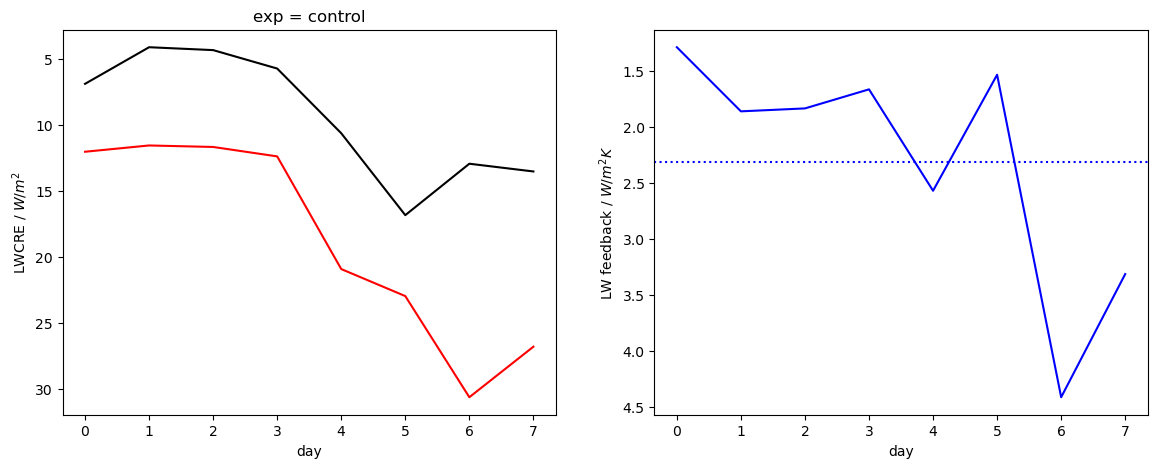

In [10]:
fig, axs = plt.subplots(1,2, figsize=(14,5))
x = data.day.values

ax = axs[0]
cre = data.sel(cloudcover=1)['thb_t'] - data.sel(cloudcover=0)['thb_t']

for exp, kw in zip(data.exp.values, [{'color':'red'},{'color':'black'}]):
    y = cre.sel(exp=exp)
    y.plot(ax=ax, **kw)# y.plot(ax=ax, **kw)
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_ylabel('LWCRE / $W/m^2$')

ax = axs[1]
swfeedback = cre.sel(exp='warming') - cre.sel(exp='control')
swfeedback.values = swfeedback.values / 4
kw = {'color':'blue'}
swfeedback.plot(ax=ax, **kw)# y.plot(ax=ax, **kw)
ax.axhline(np.mean(swfeedback.values), ls=':', **kw)
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_ylabel('LW feedback / $W/m^2K$')

fig.show()

In [11]:
fig, ax = plt.subplots(figsize=(8,1))

c_err = cre.sel(exp='control')
c_err = c_err - np.mean(c_err.values)
ax.boxplot(c_err, vert=False)
ax.set_xlabel('LWCRE - $\\overline{LWCRE}$ / $W/m^2$')
fig.show()

/var/folders/0k/t6dd90sx62z4gfqnklc1kkpw0000gp/T/ipykernel_83756/3604466609.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


In [12]:
data

<xarray.Dataset> Size: 5kB
Dimensions:        (day: 8, cloudcover: 3, exp: 2)
Coordinates:
  * exp            (exp) <U7 56B 'warming' 'control'
  * cloudcover     (cloudcover) float64 24B 0.0 0.5 1.0
  * day            (day) int64 64B 0 1 2 3 4 5 6 7
Data variables: (12/24)
    qv_2m          (day, cloudcover, exp) float32 192B 0.01872 0.015 ... 0.01601
    tot_prec       (day, cloudcover, exp) float32 192B 1.625 1.1 ... 24.0 12.8
    rain_gsp_rate  (day, cloudcover, exp) float32 192B 1.004e-05 ... 2.529e-05
    sou_t          (day, cloudcover, exp) float32 192B -47.29 -46.49 ... -88.1
    t_2m           (day, cloudcover, exp) float32 192B 302.8 298.9 ... 298.7
    shfl_s         (day, cloudcover, exp) float32 192B -23.71 -18.8 ... -15.83
    ...             ...
    v_10m          (day, cloudcover, exp) float32 192B -3.98 -3.846 ... -2.047
    sw_net         (day, cloudcover, exp) float32 192B 292.7 290.8 ... 288.5
    rad_net        (day, cloudcover, exp) float32 192B -15.78 -8.679 ... 21.06
    fl_s           (day, cloudcover, exp) float32 192B -323.2 -247.6 ... -165.7
    energyflux     (day, cloudcover, exp) float32 192B -339.0 -257.4 ... -146.2
    albedo         (day, cloudcover, exp) float32 192B 0.1894 0.193 ... 0.2708
Attributes: (12/18)
    ICON_grid_file_uri:   
    centre:               78
    crs_id:               urn:ogc:def:cs:EPSG:6.0:6422
    crs_name:             Spherical 2D Coordinate System
    ellipsoid_name:       Sphere
    global_grid:          0
    ...                   ...
    semi_major_axis:      6371229.0
    source:               svn://xceh.dwd.de/for0adm/SVN_icontools/tags/iconto...
    subcentre:            255
    title:                ICON grid description
    uuidOfHGrid:          6b59890b-99f3-939b-e76a-0a3ad2e43140
    uuidOfParHGrid:       39f9d5e2-322c-11e6-beee-d15f30d0a215

In [13]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

def load_data():
    data = xr.open_dataset('/Users/admin/levantini/dom01_subset.nc')
    data = data.mean(dim='cell', keep_attrs=True)
    return data
    
def ax_daily_completeness(ax, data):
    points_per_24h = int(pd.Timedelta('24h') / pd.to_timedelta(data.time.values[1] - data.time.values[0]))
    chunk_index = xr.DataArray(np.arange(len(data.time)) // points_per_24h, dims='time', coords={'time': data.time})
    day_counts = data.time.groupby(chunk_index).count()
    completeness = day_counts / points_per_24h
    representative_times = data.time.groupby(chunk_index).first()
    representative_times = [pd.to_datetime(r).day for r in representative_times.values]
    
    ax.set_title('Daily data completeness')
    ax.axhline(y=1, color='black', alpha=0.3, label='Full Day (100%)')

    ax.bar(representative_times, completeness, color='tab:red', width=0.4, align='center', label='Completeness (%)')
    ax.set_xlabel('Day')
    ax.set_ylabel('Completeness / %')
    ax.set_ylim(0, 1.1)
    
    ax2 = ax.twinx()
    ax2.set_ylabel('n (data points)')
    ax2.set_ylim(0, int(1.1 * points_per_24h))
    ax2.plot(representative_times, day_counts, alpha=0)
    # custom tick for the full day data points
    ax2.set_yticks(list(ax2.get_yticks()) + [points_per_24h])
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}' if x != points_per_24h else f'{int(x)} (Full Day)'))
    return ax

def ax_daily_differences(ax, data, var):
    data = data[var].sel({'exp':'warming', 'cloudcover':'0.5'})
    daily_averages = data.groupby('time.day').mean(dim='time')
    complete_days_mean = daily_averages.isel(day=slice(1,-1)).mean(dim='day')
    complete_days_std = daily_averages.std(dim='day')
    differences = daily_averages - complete_days_mean
    
    
    ax.axhline(0, color='black', alpha=0.3, label='Overall Mean')
    ax.plot(daily_averages['day'], differences, label='Difference from Mean', color='b')
    ax.fill_between(daily_averages['day'], 
                    differences - complete_days_std, 
                    differences + complete_days_std, 
                    color='b', alpha=0.2, label='±1 Std Dev')
    
    ax.set_xlabel('Day')
    ax.set_ylabel('Difference from Mean')
    ax.set_title(f'Daily differences from overall mean {data.attrs["long_name"]}')
    ax.legend()
    return fig, ax
    
fig, axs = plt.subplots(1,2, figsize=(10, 5))
axs[0] = ax_daily_completeness(axs[0], load_data())
axs[1] = ax_daily_differences(axs[1], load_data(), 'sod_t')
fig.tight_layout()
fig.show()

/var/folders/0k/t6dd90sx62z4gfqnklc1kkpw0000gp/T/ipykernel_83756/1576319381.py:61: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


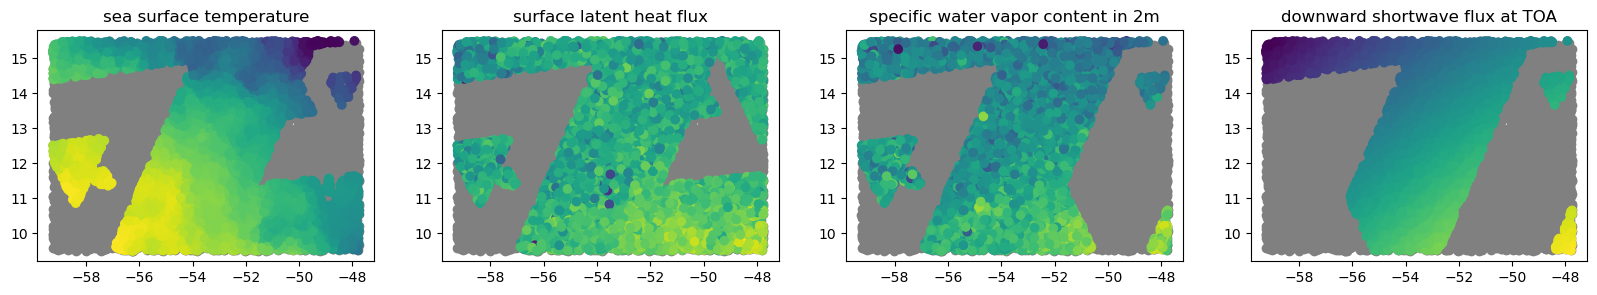

In [30]:
import matplotlib.pyplot as plt

variables = ['t_seasfc', 'lhfl_s', 'qv_2m', 'sod_t']

data = load_data()
data = data.sel({'exp':'control', 'cloudcover':0.5, 'time':data.time.values[600]})

fig, axs = plt.subplots(1,len(variables), figsize=(5*len(variables), 3))
for ax, var in zip(axs, variables):
    x = data.lon.values
    y = data.lat.values
    z = data[var].values
    
    ax.scatter(x,y, color='grey')
    ax.scatter(x,y, c=z)
    ax.set_title(data[var].attrs['long_name'])

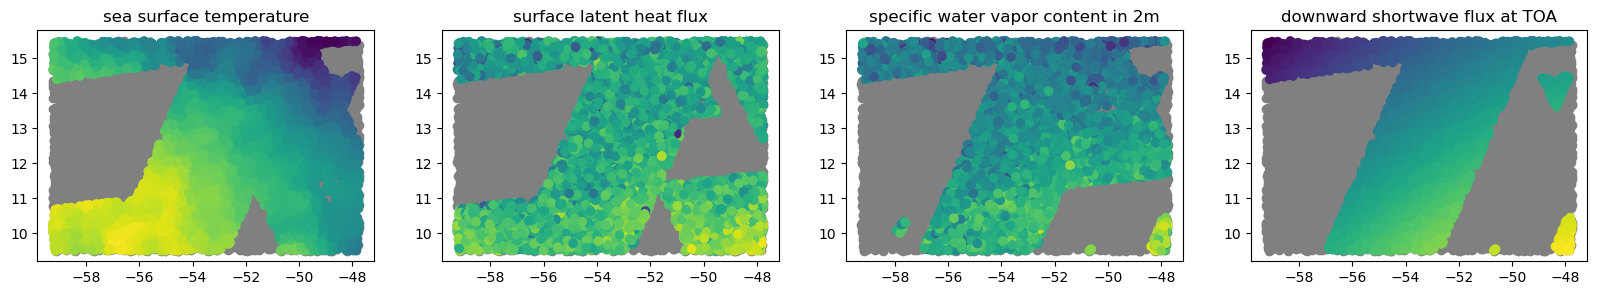

In [29]:
import matplotlib.pyplot as plt

variables = ['t_seasfc', 'lhfl_s', 'qv_2m', 'sod_t']

data = load_data()
data = data.sel({'exp':'control', 'cloudcover':0.5, 'time':data.time.values[601]})

fig, axs = plt.subplots(1,len(variables), figsize=(5*len(variables), 3))
for ax, var in zip(axs, variables):
    x = data.lon.values
    y = data.lat.values
    z = data[var].values
    
    ax.scatter(x,y, color='grey')
    ax.scatter(x,y, c=z)
    ax.set_title(data[var].attrs['long_name'])